In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv("cars.csv")
df.sample(5)

,symboling,normalized-losses,make,fuel-type,body-style,drive-wheels,engine-location,width,height,engine-type,engine-size,horsepower,city-mpg,highway-mpg,price
118,1,119,plymouth,gas,hatchback,fwd,front,63.8,50.8,ohc,90,68,37,41,5572
93,1,103,nissan,gas,wagon,fwd,front,63.8,53.5,ohc,97,69,31,37,7349
14,1,?,bmw,gas,sedan,rwd,front,66.9,55.7,ohc,164,121,20,25,24565
104,3,194,nissan,gas,hatchback,rwd,front,67.9,49.7,ohcv,181,160,19,25,17199
100,0,106,nissan,gas,sedan,fwd,front,65.2,54.7,ohc,120,97,27,34,9549


In [3]:
df.shape

(205, 15)

**Inference**
* 205 records i.e " rows "
* 15 records i.e " cols "

**Checking for unique values**

In [4]:
df["make"].unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'mazda', 'mercedes-benz', 'mercury',
       'mitsubishi', 'nissan', 'peugot', 'plymouth', 'porsche', 'renault',
       'saab', 'subaru', 'toyota', 'volkswagen', 'volvo'], dtype=object)

In [5]:
df["body-style"].unique()

array(['convertible', 'hatchback', 'sedan', 'wagon', 'hardtop'],
      dtype=object)

In [6]:
df["drive-wheels"].unique()

array(['rwd', 'fwd', '4wd'], dtype=object)

In [7]:
df["engine-location"].unique()

array(['front', 'rear'], dtype=object)

In [8]:
df["engine-type"].unique()

array(['dohc', 'ohcv', 'ohc', 'l', 'rotor', 'ohcf', 'dohcv'], dtype=object)

**Basic info**

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  205 non-null    object 
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   body-style         205 non-null    object 
 5   drive-wheels       205 non-null    object 
 6   engine-location    205 non-null    object 
 7   width              205 non-null    float64
 8   height             205 non-null    float64
 9   engine-type        205 non-null    object 
 10  engine-size        205 non-null    int64  
 11  horsepower         205 non-null    object 
 12  city-mpg           205 non-null    int64  
 13  highway-mpg        205 non-null    int64  
 14  price              205 non-null    int64  
dtypes: float64(2), int64(5), object(8)
memory usage: 24.1+ KB


**Inference**
* no null values as per info() 
* normalized-losses has int but dtypes is obj 
* horsepower has int but dtypes is object

**Handling null values**

In [10]:
### numeric representation

df.isnull().sum()

symboling            0
normalized-losses    0
make                 0
fuel-type            0
body-style           0
drive-wheels         0
engine-location      0
width                0
height               0
engine-type          0
engine-size          0
horsepower           0
city-mpg             0
highway-mpg          0
price                0
dtype: int64

<AxesSubplot:>

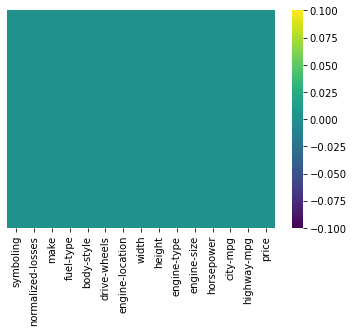

In [11]:
### graphical rep

sns.heatmap(df.isnull(),cmap="viridis",yticklabels=False)

**Inference**
* No null values in the dataset

**Handling wrong dtypes { in df.info() }**

In [12]:
df["normalized-losses"].unique()

array(['?', '164', '158', '192', '188', '121', '98', '81', '118', '148',
       '110', '145', '137', '101', '78', '106', '85', '107', '104', '113',
       '150', '129', '115', '93', '142', '161', '153', '125', '128',
       '122', '103', '168', '108', '194', '231', '119', '154', '74',
       '186', '83', '102', '89', '87', '77', '91', '134', '65', '197',
       '90', '94', '256', '95'], dtype=object)

In [13]:
df["horsepower"].unique()

array(['111', '154', '102', '115', '110', '140', '160', '101', '121',
       '182', '48', '70', '68', '88', '145', '58', '76', '60', '86',
       '100', '78', '90', '176', '262', '135', '84', '64', '120', '72',
       '123', '155', '184', '175', '116', '69', '55', '97', '152', '200',
       '95', '142', '143', '207', '288', '?', '73', '82', '94', '62',
       '56', '112', '92', '161', '156', '52', '85', '114', '162', '134',
       '106'], dtype=object)

**Inference**
* We can see "normalized-losses" & "horsepower" has ( ? ) as values Hence,{ dtype = obj } 

**Replacing the " ? " value to np.nan value**

In [14]:
df["normalized-losses"].replace("?",np.nan,inplace=True)
df["horsepower"].replace("?",np.nan,inplace=True)

In [15]:
## checking 

df["normalized-losses"].unique()

array([nan, '164', '158', '192', '188', '121', '98', '81', '118', '148',
       '110', '145', '137', '101', '78', '106', '85', '107', '104', '113',
       '150', '129', '115', '93', '142', '161', '153', '125', '128',
       '122', '103', '168', '108', '194', '231', '119', '154', '74',
       '186', '83', '102', '89', '87', '77', '91', '134', '65', '197',
       '90', '94', '256', '95'], dtype=object)

In [16]:
df["horsepower"].unique()

array(['111', '154', '102', '115', '110', '140', '160', '101', '121',
       '182', '48', '70', '68', '88', '145', '58', '76', '60', '86',
       '100', '78', '90', '176', '262', '135', '84', '64', '120', '72',
       '123', '155', '184', '175', '116', '69', '55', '97', '152', '200',
       '95', '142', '143', '207', '288', nan, '73', '82', '94', '62',
       '56', '112', '92', '161', '156', '52', '85', '114', '162', '134',
       '106'], dtype=object)

**Inference**
* replaced successfull

In [17]:
### Sum of null values { numeric representation }

df[["normalized-losses","horsepower"]].isnull().sum()

normalized-losses    41
horsepower            2
dtype: int64

<AxesSubplot:>

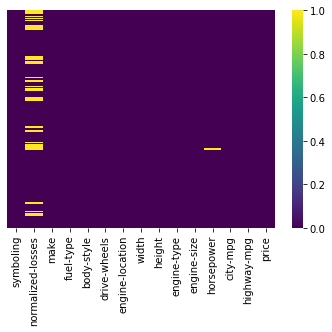

In [18]:
### graphical rep { null values }

sns.heatmap(df.isnull(),cmap="viridis",yticklabels=False)

**Inference**
* we can see the null values in { "normalized-losses" & "horsepower" }

**Fill na**

In [19]:
### numeric rep

df.describe()

,symboling,width,height,engine-size,city-mpg,highway-mpg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.834146,65.907805,53.724878,126.907317,25.219512,30.751220,13227.478049
std,1.245307,2.145204,2.443522,41.642693,6.542142,6.886443,7902.651615
min,-2.000000,60.300000,47.800000,61.000000,13.000000,16.000000,5118.000000
25%,0.000000,64.100000,52.000000,97.000000,19.000000,25.000000,7788.000000
50%,1.000000,65.500000,54.100000,120.000000,24.000000,30.000000,10345.000000
75%,2.000000,66.900000,55.500000,141.000000,30.000000,34.000000,16500.000000
max,3.000000,72.300000,59.800000,326.000000,49.000000,54.000000,45400.000000


<function matplotlib.pyplot.plot(*args, scalex=True, scaley=True, data=None, **kwargs)>

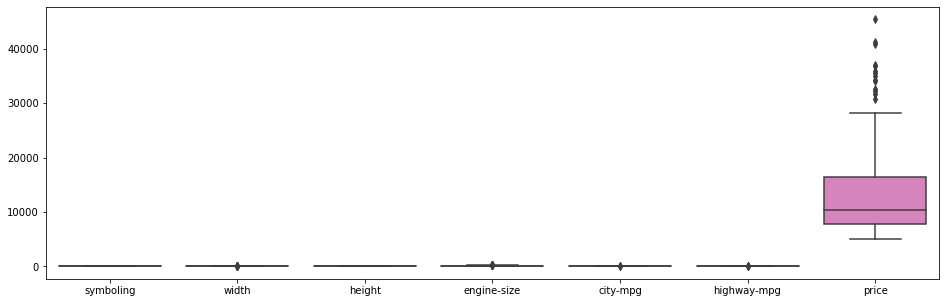

In [20]:
### graphical rep

plt.figure(figsize=(16,5))
sns.boxplot(data=df)
plt.plot

**Inference**
* numeric rep as mean and median has no such huge difference.Hence, no outliers
* graphical rep no outliers to be found

**Filling na**

In [21]:
### fill na w/ median

df["normalized-losses"].fillna(df["normalized-losses"].median(),inplace=True)
df["horsepower"].fillna(df["horsepower"].median(),inplace=True)

In [22]:
### numeric rep

df[["normalized-losses","horsepower"]].isnull().sum()

normalized-losses    0
horsepower           0
dtype: int64

<AxesSubplot:>

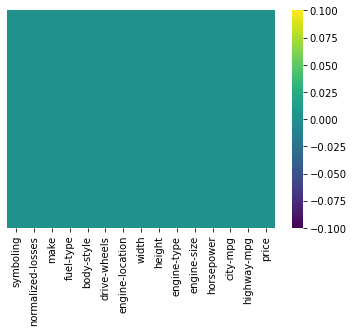

In [23]:
### graphical rep

sns.heatmap(df.isnull(),cmap="viridis",yticklabels=False)

**Inference**
* no null values to be seen in the dataset thru { numeric & graphical rep }

In [24]:
### check

df.sample(5)

,symboling,normalized-losses,make,fuel-type,body-style,drive-wheels,engine-location,width,height,engine-type,engine-size,horsepower,city-mpg,highway-mpg,price
110,0,115.0,peugot,diesel,wagon,rwd,front,68.4,58.7,l,152,95,25,25,13860
185,2,94,volkswagen,gas,sedan,fwd,front,65.5,55.7,ohc,109,85,27,34,8195
171,2,134,toyota,gas,hatchback,rwd,front,65.6,52.0,ohc,146,116,24,30,11549
130,0,115.0,renault,gas,wagon,fwd,front,66.5,55.2,ohc,132,95.0,23,31,9295
65,0,118,mazda,gas,sedan,rwd,front,66.1,54.4,ohc,140,120,19,27,18280


**Changing dtypes**

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  205 non-null    object 
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   body-style         205 non-null    object 
 5   drive-wheels       205 non-null    object 
 6   engine-location    205 non-null    object 
 7   width              205 non-null    float64
 8   height             205 non-null    float64
 9   engine-type        205 non-null    object 
 10  engine-size        205 non-null    int64  
 11  horsepower         205 non-null    object 
 12  city-mpg           205 non-null    int64  
 13  highway-mpg        205 non-null    int64  
 14  price              205 non-null    int64  
dtypes: float64(2), int64(5), object(8)
memory usage: 24.1+ KB


In [26]:
df["normalized-losses"]=df["normalized-losses"].astype(float)
df["horsepower"]=df["horsepower"].astype(float)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  205 non-null    float64
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   body-style         205 non-null    object 
 5   drive-wheels       205 non-null    object 
 6   engine-location    205 non-null    object 
 7   width              205 non-null    float64
 8   height             205 non-null    float64
 9   engine-type        205 non-null    object 
 10  engine-size        205 non-null    int64  
 11  horsepower         205 non-null    float64
 12  city-mpg           205 non-null    int64  
 13  highway-mpg        205 non-null    int64  
 14  price              205 non-null    int64  
dtypes: float64(4), int64(5), object(6)
memory usage: 24.1+ KB


**Inference**
* dtypes of all the features are proper 

**Handling Outliers { specific to company }**

In [27]:
df["make"].unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'mazda', 'mercedes-benz', 'mercury',
       'mitsubishi', 'nissan', 'peugot', 'plymouth', 'porsche', 'renault',
       'saab', 'subaru', 'toyota', 'volkswagen', 'volvo'], dtype=object)

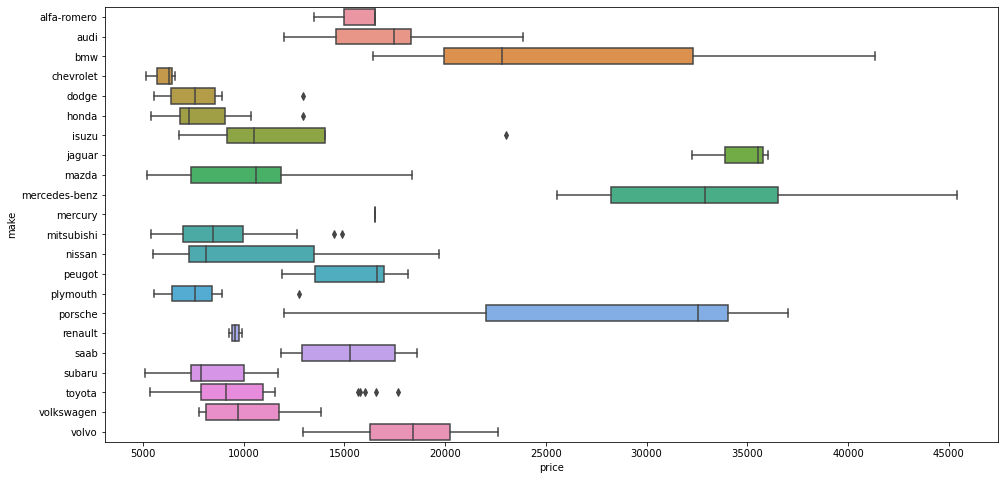

In [28]:
### outliers for specific company

plt.figure(figsize=(16,8))
sns.boxplot(x=df["price"],y=df["make"])
plt.show()

**Inference**
* toyota,plymouth,mitsubishi,isuzu,dodge,honda { has outliers } 

In [29]:
df[(df["make"]=="toyota") & (df["price"]>15000)] 

,symboling,normalized-losses,make,fuel-type,body-style,drive-wheels,engine-location,width,height,engine-type,engine-size,horsepower,city-mpg,highway-mpg,price
172,2,134.0,toyota,gas,convertible,rwd,front,65.6,53.0,ohc,146,116.0,24,30,17669
178,3,197.0,toyota,gas,hatchback,rwd,front,67.7,52.0,dohc,171,161.0,20,24,16558
179,3,197.0,toyota,gas,hatchback,rwd,front,67.7,52.0,dohc,171,161.0,19,24,15998
180,-1,90.0,toyota,gas,sedan,rwd,front,66.5,54.1,dohc,171,156.0,20,24,15690
181,-1,115.0,toyota,gas,wagon,rwd,front,66.5,54.1,dohc,161,156.0,19,24,15750


In [30]:
df.drop([172,178,179,180,181],inplace=True)

In [31]:
df[(df["make"]=="plymouth") & (df["price"]>10000)] 

,symboling,normalized-losses,make,fuel-type,body-style,drive-wheels,engine-location,width,height,engine-type,engine-size,horsepower,city-mpg,highway-mpg,price
124,3,115.0,plymouth,gas,hatchback,rwd,front,66.3,50.2,ohc,156,145.0,19,24,12764


In [32]:
df.drop([124],inplace=True)

In [33]:
df[(df["make"]=="mitsubishi") & (df["price"]>13000)] 

,symboling,normalized-losses,make,fuel-type,body-style,drive-wheels,engine-location,width,height,engine-type,engine-size,horsepower,city-mpg,highway-mpg,price
83,3,115.0,mitsubishi,gas,hatchback,fwd,front,66.3,50.2,ohc,156,145.0,19,24,14869
84,3,115.0,mitsubishi,gas,hatchback,fwd,front,66.3,50.2,ohc,156,145.0,19,24,14489


In [34]:
df.drop([83,84],inplace=True)

In [35]:
df[(df["make"]=="isuzu") & (df["price"]>20000)] 

,symboling,normalized-losses,make,fuel-type,body-style,drive-wheels,engine-location,width,height,engine-type,engine-size,horsepower,city-mpg,highway-mpg,price
45,0,115.0,isuzu,gas,sedan,fwd,front,63.6,52.0,ohc,90,70.0,38,43,23000


In [36]:
df.drop([45],inplace=True)

In [37]:
df[(df["make"]=="dodge") & (df["price"]>12000)] 

,symboling,normalized-losses,make,fuel-type,body-style,drive-wheels,engine-location,width,height,engine-type,engine-size,horsepower,city-mpg,highway-mpg,price
29,3,145.0,dodge,gas,hatchback,fwd,front,66.3,50.2,ohc,156,145.0,19,24,12964


In [38]:
df.drop([29],inplace=True)

In [39]:
df[(df["make"]=="honda") & (df["price"]>12000)] 

,symboling,normalized-losses,make,fuel-type,body-style,drive-wheels,engine-location,width,height,engine-type,engine-size,horsepower,city-mpg,highway-mpg,price
41,0,85.0,honda,gas,sedan,fwd,front,65.2,54.1,ohc,110,101.0,24,28,12945


In [40]:
df.drop([41],inplace=True)

**Checking for outliers**

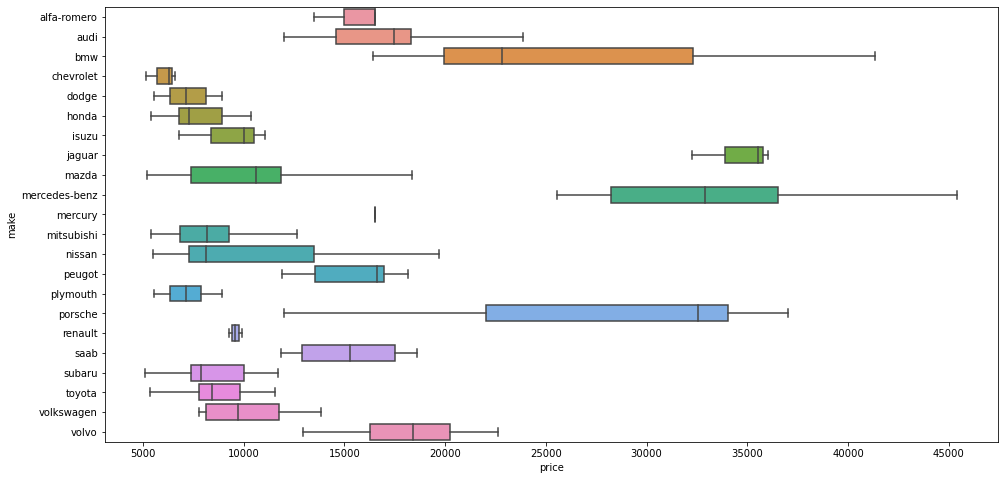

In [41]:
### graphical rep

plt.figure(figsize=(16,8))
sns.boxplot(x=df["price"],y=df["make"])
plt.show()

**Inference**
* we can clearly see there no outliers in the dataset 

**Correlation with the target variable { price }**

In [42]:
df.shape

(194, 15)

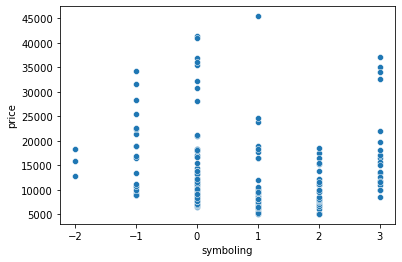

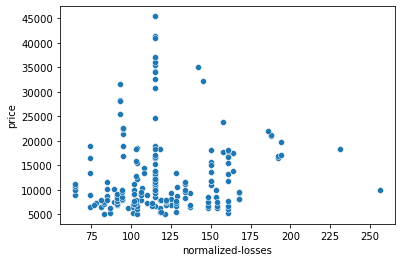

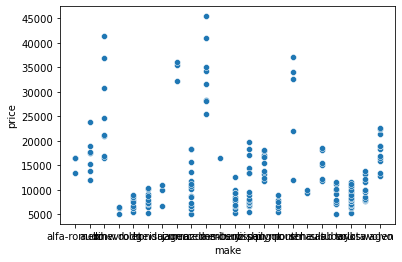

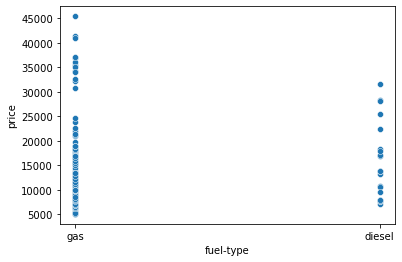

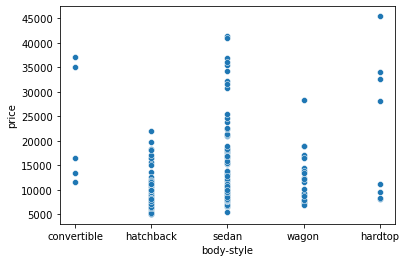

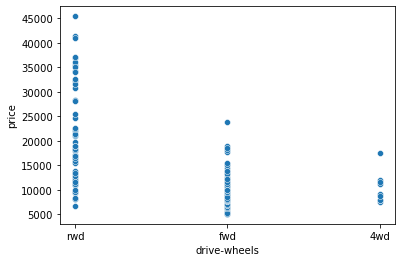

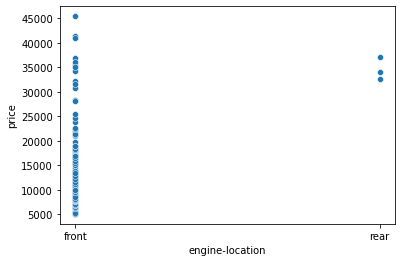

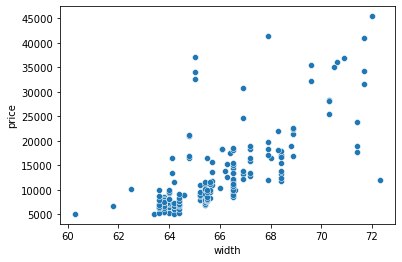

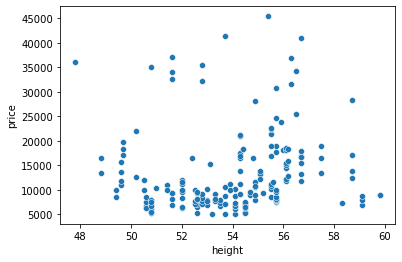

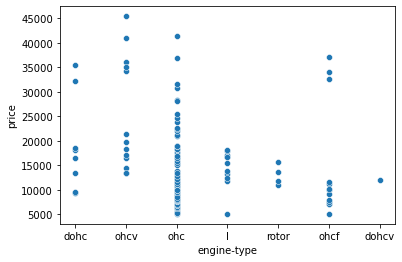

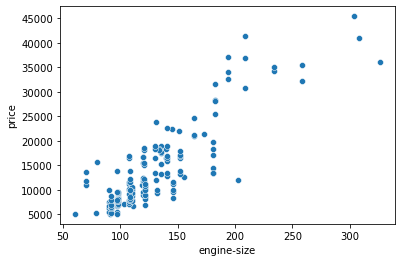

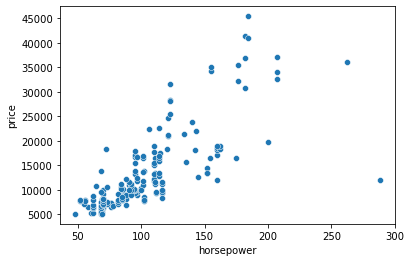

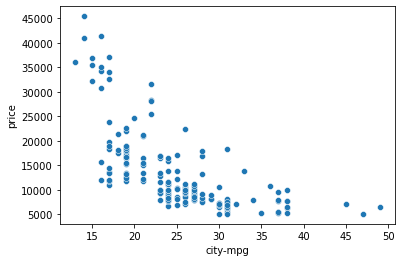

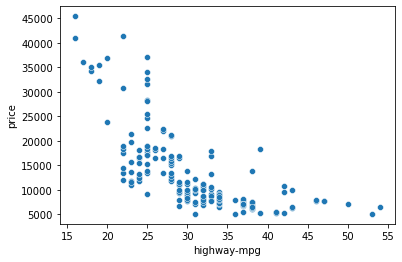

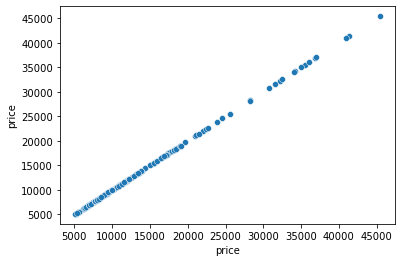

In [43]:
### graphical representation

for cols in df:

    plt.figure()
    sns.scatterplot(x=df[cols],y=df["price"])
    plt.show

In [44]:
### numeric representation

df.corr()["price"]

symboling           -0.095905
normalized-losses    0.089790
width                0.730503
height               0.147010
engine-size          0.869638
horsepower           0.769844
city-mpg            -0.680412
highway-mpg         -0.704846
price                1.000000
Name: price, dtype: float64

**Inference**
* we can clearly see there is no linear relation of 
* { "make", "fuel-type","height" ,"body-style","normalized-losses","engine-type", "symboling","city-mpg","highway-mpg" } with { price }
* Hence, Dropping the columns 

In [45]:
df.drop(["make", "fuel-type","height" ,"body-style","normalized-losses","engine-type", "symboling","city-mpg","highway-mpg"],axis=1,inplace=True)

In [46]:
df.head()

,drive-wheels,engine-location,width,engine-size,horsepower,price
0,rwd,front,64.1,130,111.0,13495
1,rwd,front,64.1,130,111.0,16500
2,rwd,front,65.5,152,154.0,16500
3,fwd,front,66.2,109,102.0,13950
4,4wd,front,66.4,136,115.0,17450


In [47]:
df["drive-wheels"].unique()

array(['rwd', 'fwd', '4wd'], dtype=object)

In [48]:
df["engine-location"].unique()

array(['front', 'rear'], dtype=object)

**Label Encoding**

In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 194 entries, 0 to 204
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   drive-wheels     194 non-null    object 
 1   engine-location  194 non-null    object 
 2   width            194 non-null    float64
 3   engine-size      194 non-null    int64  
 4   horsepower       194 non-null    float64
 5   price            194 non-null    int64  
dtypes: float64(2), int64(2), object(2)
memory usage: 10.6+ KB


In [50]:
### sepearting the dtypes 

df_obj=df.select_dtypes(object)
df_obj.head()

,drive-wheels,engine-location
0,rwd,front
1,rwd,front
2,rwd,front
3,fwd,front
4,4wd,front


In [51]:
df_num=df.select_dtypes([int,float])
df_num.head()

,width,engine-size,horsepower,price
0,64.1,130,111.0,13495
1,64.1,130,111.0,16500
2,65.5,152,154.0,16500
3,66.2,109,102.0,13950
4,66.4,136,115.0,17450


In [52]:
### performing label encoding on obj dtype

## import module 
from sklearn.preprocessing import LabelEncoder
## make instance 
le=LabelEncoder()
## execute 
for col in df_obj:
    df_obj[col]=le.fit_transform(df_obj[col])

In [53]:
### check 

df_obj.head()

,drive-wheels,engine-location
0,2,0
1,2,0
2,2,0
3,1,0
4,0,0


**Inference**
* LabelEncoding is successfully applied 

In [54]:
### classes check 

le.classes_

array(['front', 'rear'], dtype=object)

In [55]:
### concat { obj & num }

df=pd.concat([df_obj,df_num],axis=1)
df.head()

,drive-wheels,engine-location,width,engine-size,horsepower,price
0,2,0,64.1,130,111.0,13495
1,2,0,64.1,130,111.0,16500
2,2,0,65.5,152,154.0,16500
3,1,0,66.2,109,102.0,13950
4,0,0,66.4,136,115.0,17450


**Model Building**

In [56]:
### seperate the data
x=df.drop("price",axis=1)
y=df["price"]

In [57]:
### check

x.head()

,drive-wheels,engine-location,width,engine-size,horsepower
0,2,0,64.1,130,111.0
1,2,0,64.1,130,111.0
2,2,0,65.5,152,154.0
3,1,0,66.2,109,102.0
4,0,0,66.4,136,115.0


In [58]:
y

0      13495
1      16500
2      16500
3      13950
4      17450
       ...  
200    16845
201    19045
202    21485
203    22470
204    22625
Name: price, Length: 194, dtype: int64

In [59]:
### train test

from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.3,random_state=1)

In [60]:
### model 

from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(xtrain,ytrain)
ypred=lr.predict(xtest)

In [61]:
ypred

array([31209.85577085, 10144.15904503, 15728.08585275,  6743.10905729,
        9877.75377237, 11196.97234236, 31998.83852937, 10879.43720897,
       10144.15904503, 15967.96312519, 10144.15904503, 14595.10180452,
        6305.2345988 , 25274.17279196,  9089.40495925, 12510.58637493,
       10396.76196473,  6779.60230113,  5325.20285208, 34028.        ,
        6779.60230113, 12692.25749192, 19120.49140136, 12315.97550449,
       11245.82258577, 12315.97550449,  6478.62975056, 13456.50163747,
        8835.00803377, 12861.16721481, 25602.3214885 , 34028.        ,
       12315.97550449, 19120.49140136, 17148.52170207, 18800.72629099,
       11127.01093387,  6104.16593434, 15967.96312519, 18178.62735436,
        7793.22352026, 11000.86213429, 29559.14858792,  8358.52990436,
        6849.24163492,  6903.16006108,  7651.57550428, 17148.52170207,
       18712.70620317, 18712.70620317,  6104.16593434, 28458.15012087,
       13958.30633873,  6966.12732089, 11702.99420827,  6779.60230113,
      

<AxesSubplot:xlabel='price'>

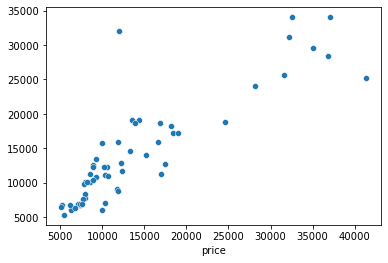

In [62]:
sns.scatterplot(ytest,ypred)

**Evaluation Metrics**

In [63]:
### modules

from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [64]:
print("MAE",mean_absolute_error(ytest,ypred))
print("MSE",mean_squared_error(ytest,ypred))
print("RMSE",np.sqrt(mean_squared_error(ytest,ypred)))
print("Accuracy",r2_score(ytest,ypred)*100)

MAE 2821.0593977435483
MSE 19958827.561724313
RMSE 4467.530364947093
Accuracy 75.72135970849601


**Accuracy test**
* Accuracy high for train & test i.e { Good fit model }  
* Accuracy high for train & low accuracy test i.e { Over fit model }
* Accuracy low for train & test i.e { Under fit model }

In [65]:
lr.score(xtrain,ytrain)

0.871310280462842

In [66]:
lr.score(xtest,ytest)

0.7572135970849602

**Pickle**

In [67]:
import pickle

In [68]:
### pickling 

pickle.dump(lr , open("car_price_model.pkl" , "wb"))

**Flask**

In [69]:
x.columns

Index(['drive-wheels', 'engine-location', 'width', 'engine-size',
       'horsepower'],
      dtype='object')

In [70]:
x["drive-wheels"].unique()

### here, rwd = 2, fwd = 1, 4wd = 0

array([2, 1, 0])

In [71]:
df["engine-location"].unique()

### here, front = 0, rear = 1

array([0, 1])